### 1. Veri Setinin Kısa Hikayesi

Bu veri seti, Marvel ve DC evrenlerindeki süper kahramanların fiziksel ve zihinsel özelliklerini bir araya getirir.
Kahramanların cinsiyeti, ırkı, güç, hız, zeka ve tarafı (iyi, kötü, tarafsız) gibi bilgileri içerir.
Amaç, kahramanların özellikleri ile onların karakter eğilimleri arasındaki ilişkileri inceleyerek veri bilimiyle çizgi roman dünyasına analitik bir bakış sunmaktır.

Veri Kaynağı: Kaggle – Superheroes Dataset

In [286]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [287]:
heroes = pd.read_csv("/Users/reyhansenayilmaz/Documents/superheroes_analysis.csv/data/heroes_information.csv")


In [288]:
heroes.head()

,Unnamed: 0,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


Unnamed:0 sütunu satır indexlerini gösterme amacıyla oluşmuştur. Bu sütun satır numaralarını temsil ettiği için analiz açısından anlamsız olduğundan siliyorum.

In [289]:
if 'Unnamed: 0' in heroes.columns:
    heroes = heroes.drop(columns=['Unnamed: 0'])

In [290]:
heroes.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [291]:
heroes.dtypes

name           object
Gender         object
Eye color      object
Race           object
Hair color     object
Height        float64
Publisher      object
Skin color     object
Alignment      object
Weight        float64
dtype: object

In [292]:
print("Dataset Shape:", heroes.shape)
print("\nColumns:", list(heroes.columns))
print(heroes.isnull().sum())

Dataset Shape: (734, 10)

Columns: ['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight']
name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64


In [293]:
heroes.replace(-99.0, np.nan, inplace=True)
heroes.replace('-', 'Unknown' , inplace=True)
heroes.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Unknown,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Unknown,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,Unknown,bad,NaN


### 2. Temel Veri Analizi (EDA)

In [294]:
heroes.describe()

,Height,Weight
count,517.000000,495.000000
mean,186.726306,112.252525
std,59.251895,104.151142
min,15.200000,2.000000
25%,173.000000,61.000000
50%,183.000000,81.000000
75%,191.000000,108.000000
max,975.000000,900.000000


In [295]:
heroes.columns

Index(['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height',
       'Publisher', 'Skin color', 'Alignment', 'Weight'],
      dtype='object')

In [296]:
heroes['Alignment'].unique()

array(['good', 'bad', 'Unknown', 'neutral'], dtype=object)

In [297]:
heroes['Publisher'].unique()

array(['Marvel Comics', 'Dark Horse Comics', 'DC Comics', 'NBC - Heroes',
       'Wildstorm', 'Image Comics', nan, 'Icon Comics', 'SyFy',
       'Hanna-Barbera', 'George Lucas', 'Team Epic TV', 'South Park',
       'HarperCollins', 'ABC Studios', 'Universal Studios', 'Star Trek',
       'IDW Publishing', 'Shueisha', 'Sony Pictures', 'J. K. Rowling',
       'Titan Books', 'Rebellion', 'Microsoft', 'J. R. R. Tolkien'],
      dtype=object)

In [298]:
heroes['Gender'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

In [299]:
heroes['Skin color'] = heroes['Skin color'].replace('-', np.nan)
heroes

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,Unknown,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,Unknown,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,Unknown,bad,NaN
...,...,...,...,...,...,...,...,...,...,...
729,Yellowjacket II,Female,blue,Human,Strawberry Blond,165.0,Marvel Comics,Unknown,good,52.0
730,Ymir,Male,white,Frost Giant,No Hair,304.8,Marvel Comics,white,good,NaN
731,Yoda,Male,brown,Yoda's species,White,66.0,George Lucas,green,good,17.0
732,Zatanna,Female,blue,Human,Black,170.0,DC Comics,Unknown,good,57.0


In [300]:
heroes = heroes.drop_duplicates()

Value Counts

In [301]:
heroes[heroes["Alignment"] == "bad"]["Gender"].value_counts()
#Kötü kahramanların cinsiyet dağılımları

Gender
Male       165
Female      35
Unknown      7
Name: count, dtype: int64

In [302]:
heroes[heroes["Hair color"] == "Black"]["Gender"].value_counts()
# saçı siyah olanların cinsiyet dağılımı

Gender
Male       110
Female      45
Unknown      3
Name: count, dtype: int64

In [303]:
print(heroes[["Height", "Weight"]].describe())

           Height      Weight
count  517.000000  495.000000
mean   186.726306  112.252525
std     59.251895  104.151142
min     15.200000    2.000000
25%    173.000000   61.000000
50%    183.000000   81.000000
75%    191.000000  108.000000
max    975.000000  900.000000


In [304]:
pd.crosstab(heroes['Publisher'], heroes['Alignment'], normalize='index').round(2) * 100

Alignment,Unknown,bad,good,neutral
Publisher,,,,
ABC Studios,0.0,0.0,100.0,0.0
DC Comics,0.0,27.0,66.0,6.0
Dark Horse Comics,0.0,33.0,67.0,0.0
George Lucas,0.0,43.0,57.0,0.0
Hanna-Barbera,0.0,0.0,100.0,0.0
HarperCollins,0.0,0.0,100.0,0.0
IDW Publishing,0.0,0.0,100.0,0.0
Icon Comics,0.0,25.0,75.0,0.0
Image Comics,7.0,79.0,14.0,0.0


In [305]:
categorical_cols = heroes.select_dtypes(include="object").columns.tolist()
numerical_cols = heroes.select_dtypes(exclude="object").columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Publisher', 'Skin color', 'Alignment']
Numerical Columns: ['Height', 'Weight']


Aykırı Değer Analizi

In [306]:
def detect_outliers_IQR(heroes, col):
    Q1 = heroes[col].quantile(0.25)
    Q3 = heroes[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    outliers = heroes[(heroes[col] < lower_limit) | (heroes[col] > upper_limit)]

    print(f"\n{col} Outlier Summary:")
    print(f"Q1 (25%): {Q1:.2f}")
    print(f"Q3 (75%): {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"Lower Limit: {lower_limit:.2f}")
    print(f"Upper Limit: {upper_limit:.2f}")
    print(f"Outlier Count: {outliers.shape[0]} ({round(outliers.shape[0] / heroes[col].dropna().shape[0] * 100, 2)}%)")

    return outliers

outliers_height = detect_outliers_IQR(heroes, "Height")
outliers_weight = detect_outliers_IQR(heroes, "Weight")



Height Outlier Summary:
Q1 (25%): 173.00
Q3 (75%): 191.00
IQR: 18.00
Lower Limit: 146.00
Upper Limit: 218.00
Outlier Count: 42 (8.12%)

Weight Outlier Summary:
Q1 (25%): 61.00
Q3 (75%): 108.00
IQR: 47.00
Lower Limit: -9.50
Upper Limit: 178.50
Outlier Count: 60 (12.12%)


In [307]:
heroes["Height"] = heroes["Height"].replace(-99, np.nan)
heroes["Weight"] = heroes["Weight"].replace(-99, np.nan)
#-99 değerini nan yapatım

/var/folders/tb/x26q917n19n8p2yddh4z45nw0000gn/T/ipykernel_798/3430428405.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heroes["Height"] = heroes["Height"].replace(-99, np.nan)
/var/folders/tb/x26q917n19n8p2yddh4z45nw0000gn/T/ipykernel_798/3430428405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heroes["Weight"] = heroes["Weight"].replace(-99, np.nan)


In [308]:
missing_count = heroes[["Height", "Weight"]].isnull().sum()
missing_percent = (heroes[["Height", "Weight"]].isnull().mean() * 100).round(2)

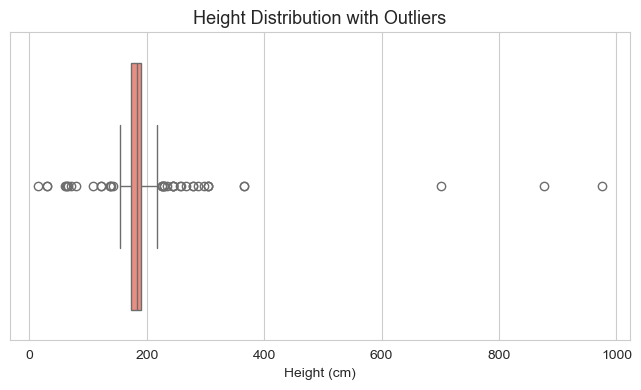

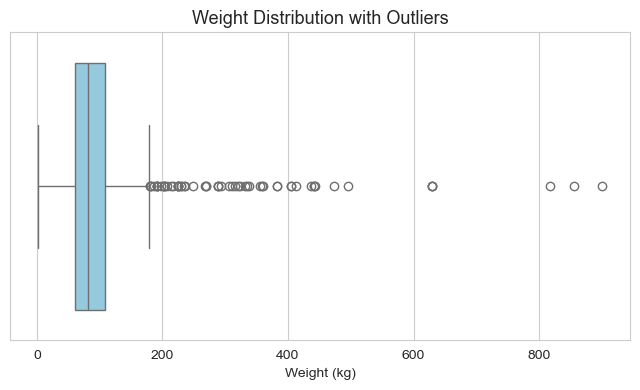

In [309]:
plt.figure(figsize=(8,4))
sns.boxplot(data=heroes, x="Height", color="salmon")
plt.title("Height Distribution with Outliers", fontsize=13)
plt.xlabel("Height (cm)")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(data=heroes, x="Weight", color="skyblue")
plt.title("Weight Distribution with Outliers", fontsize=13)
plt.xlabel("Weight (kg)")
plt.show()

Normal bir veri setinde aykırı değer ölçüm hatası, yanlış girdi veya uç durum anlamına gelir fakat bu veri setinde olağanüstü özelliklere sahip karakteri temsil ediyor o değerleri yanlış ölçüm olarak almıyoruz.

Bu veri setinde aykırı değerler çok önemlidir çünkü onları çıkardığımızda ortalama sadece insan benzeri kahramanları analizlemiş oluruz.

### 3. Veri Görselleştirme

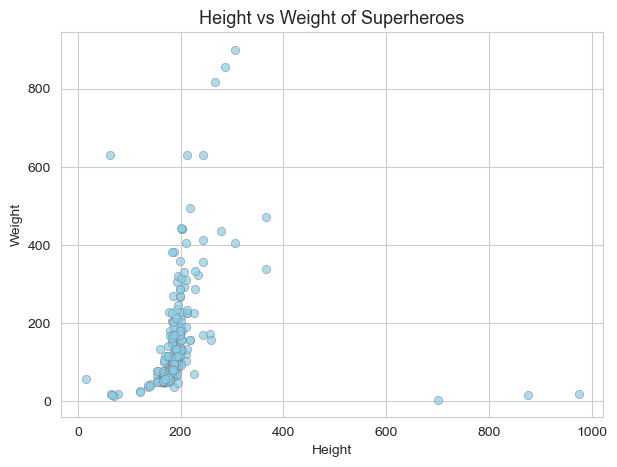

In [310]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=heroes[heroes["Alignment"] != "Unknown"], 
    x="Height",y="Weight",color="skyblue",   
    alpha=0.7,edgecolor="gray" )  
plt.title("Height vs Weight of Superheroes", fontsize=13)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

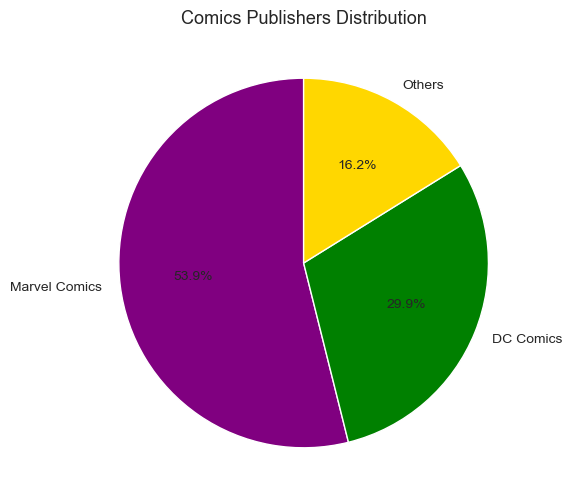

In [311]:
hero_p = heroes.Publisher.value_counts()
hero_p = pd.DataFrame({
    'label': ['Marvel Comics', 'DC Comics', 'Others'],
    'value': hero_p[:2].values.tolist() + [hero_p[2:].sum()]
}) 
plt.figure(figsize=(6,6))                      
plt.pie(hero_p['value'],                       
        labels=hero_p['label'],               
        autopct='%1.1f%%',                     
        startangle=90,                        
        colors=['purple', 'green', 'gold' ])
plt.title('Comics Publishers Distribution', fontsize=13)
plt.show()

#Marvel ve Dc en fazla olduğu için bunu görselleştirmek istedim

Irk ve cinsiyete göre boyun ve kilonun dağılımına bakalım

In [312]:
df = pd.read_csv("/Users/reyhansenayilmaz/Documents/superheroes_analysis.csv/data/heroes_information.csv")

In [313]:
df.columns = df.columns.str.strip()
df['Race'] = df['Race'].astype(str).str.strip().replace({'-':'Unknown', 'nan':'Unknown', '':'Unknown'})
df['Gender'] = df['Gender'].astype(str).str.strip().replace({'-':'Unknown', 'nan':'Unknown', '':'Unknown'})

In [314]:
for c in ['Height','Weight']:
    df[c] = pd.to_numeric(df[c], errors='coerce')
    df.loc[df[c] <= 0, c] = np.nan

valid_races = (
    df['Race'].value_counts()
    [lambda s: (s >= 10) & (s.index != 'Unknown')]
    .index
)
#En az 10 karakteri olan ırkı yaptım 

df_filtered = df[df['Race'].isin(valid_races)].copy()

avg_height = (
    df_filtered.groupby(['Race', 'Gender'])['Height']
    .mean()
    .reset_index()
    .sort_values('Height', ascending=False)
)

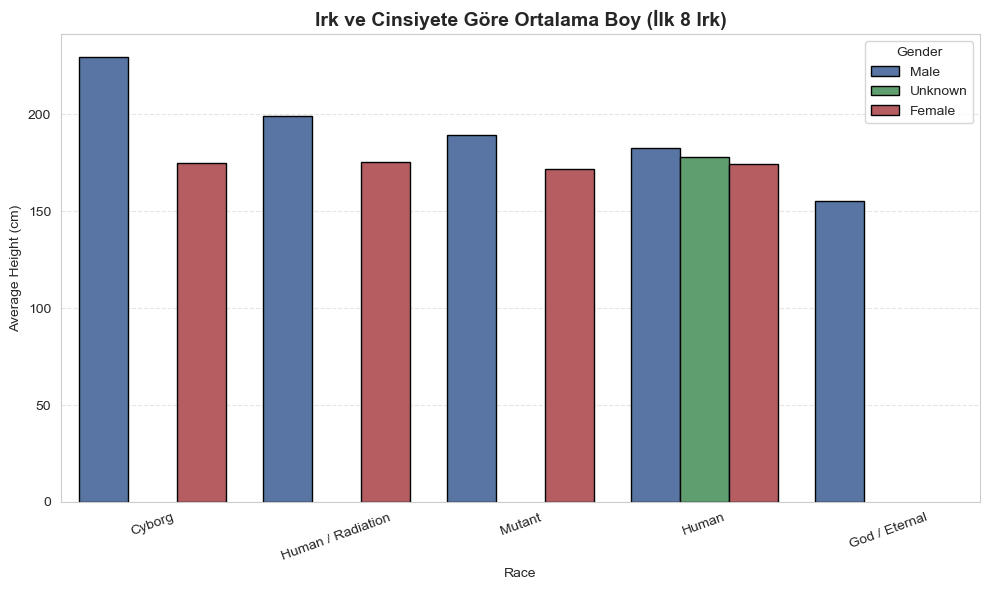

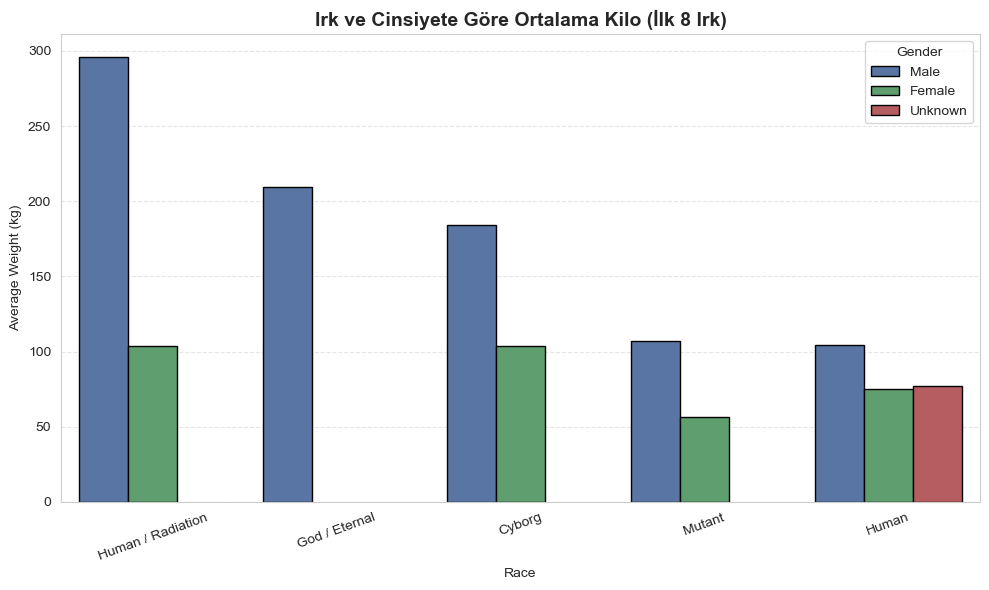

In [315]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_height, x='Race', y='Height', hue='Gender',
    palette=['#4C72B0', '#55A868', '#C44E52'], edgecolor='black', errorbar=None
)
plt.title('Irk ve Cinsiyete Göre Ortalama Boy (İlk 8 Irk)', fontsize=14, weight='bold')
plt.xlabel('Race'); plt.ylabel('Average Height (cm)')
plt.xticks(rotation=20); plt.ylim(0, None)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()

avg_weight = (
    df_filtered.groupby(['Race','Gender'])['Weight']
    .mean().reset_index()
    .sort_values(by='Weight', ascending=False)
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_weight, x='Race', y='Weight', hue='Gender',
    palette=['#4C72B0', '#55A868', '#C44E52'], edgecolor='black', errorbar=None
)
plt.title('Irk ve Cinsiyete Göre Ortalama Kilo (İlk 8 Irk)', fontsize=14, weight='bold')
plt.xlabel('Race'); plt.ylabel('Average Weight (kg)')
plt.xticks(rotation=20); plt.ylim(0, None)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Gender', loc='upper right')
plt.tight_layout()
plt.show()


Alignmente göre boy ve kilo dağılımına bakalım

In [316]:

df['Alignment'] = df['Alignment'].astype(str).str.strip().replace({'-':'Unknown', 'nan':'Unknown', '':'Unknown'})
df[['Alignment','Height','Weight']].isnull().sum()


alignment_stats = (
    df.groupby('Alignment')[['Height', 'Weight']]
    .mean()
    .round(1)
    .sort_values('Height', ascending=False)
)
print(alignment_stats)


           Height  Weight
Alignment                
neutral     237.4   198.1
Unknown     203.8   175.7
bad         187.1   139.8
good        183.8    95.5


/var/folders/tb/x26q917n19n8p2yddh4z45nw0000gn/T/ipykernel_798/1055053520.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/tb/x26q917n19n8p2yddh4z45nw0000gn/T/ipykernel_798/1055053520.py:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
/var/folders/tb/x26q917n19n8p2yddh4z45nw0000gn/T/ipykernel_798/1055053520.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/tb/x26q917n19n8p2yddh4z45nw0000gn/T/ipykernel_798/1055053520.py:12: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.barplot

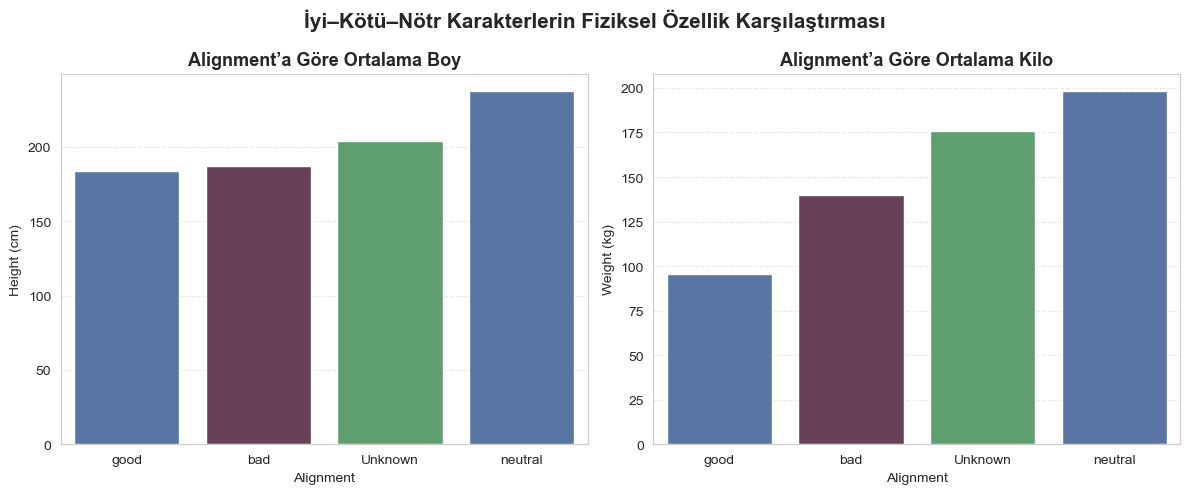

In [317]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.barplot(
    data=df, x='Alignment', y='Height',
    hue=None, palette=['#4C72B0', "#6F3A5A", '#55A868'],
    ax=axes[0], errorbar=None
)
axes[0].set_title('Alignment’a Göre Ortalama Boy', fontsize=13, weight='bold')
axes[0].set_ylabel('Height (cm)')
axes[0].grid(axis='y', linestyle='--', alpha=0.4)

sns.barplot(
    data=df, x='Alignment', y='Weight',
    hue=None, palette=['#4C72B0', "#6F3A5A", "#55A868"],
    ax=axes[1], errorbar=None
)
axes[1].set_title('Alignment’a Göre Ortalama Kilo', fontsize=13, weight='bold')
axes[1].set_ylabel('Weight (kg)')
axes[1].grid(axis='y', linestyle='--', alpha=0.4)

plt.suptitle('İyi–Kötü–Nötr Karakterlerin Fiziksel Özellik Karşılaştırması', fontsize=15, weight='bold')
plt.tight_layout()
plt.show()


| **Alignment (Karakter Tipi)** | **Ortalama Boy (cm)** | **Ortalama Kilo (kg)** | **Fiziksel Özellik Yorumu**                                                                                                                            |
| ----------------------------- | --------------------- | ---------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------ |
|  **Neutral (Nötr)**         | **En yüksek**         | **En yüksek**          | Nötr karakterler (ör. Venom, Deadpool, Catwoman) fiziksel olarak en iri ve güçlü gruptur. Boy ve kilo açısından tüm grupları geride bırakmıştır.       |
| **Unknown**                | **Yüksek**            | **Yüksek**             | Irkı veya sınıfı belirsiz (tanrısal, kozmik) karakterlerdir. Fiziksel olarak güçlü, ancak veri çeşitliliği fazla olduğu için dağılım geniştir.         |
| **Bad (Kötü)**             | **Orta**              | **Orta**               | Kötü karakterler genelde insan formunda veya teknolojik kökenlidir. Aşırı güçlü istisnalar (ör. Thanos) dışarıda kaldığı için ortalamaları dengelidir. |
| **Good (İyi)**             | **En düşük**          | **En düşük**           | İyiler genellikle insan veya insana yakın kahramanlardır (ör. Batman, Captain America). Atletik ama ortalama fiziksel değerlere sahiptirler.           |


In [318]:
df_pub = df[df['Publisher'].isin(['Marvel Comics', 'DC Comics'])]

alignment_compare = (
    df_pub.groupby(['Publisher', 'Alignment'])[['Height', 'Weight']]
    .mean()
    .round(1)
    .reset_index()
)

print(alignment_compare)


       Publisher Alignment  Height  Weight
0      DC Comics   Unknown   183.0    81.0
1      DC Comics       bad   186.0   149.2
2      DC Comics      good   177.7    80.9
3      DC Comics   neutral   192.9   133.9
4  Marvel Comics   Unknown   214.3   223.0
5  Marvel Comics       bad   187.2   134.6
6  Marvel Comics      good   188.1   103.1
7  Marvel Comics   neutral   277.0   255.2


Marvel ve DC evrenlerinde kötü karakterler fiziksel olarak oldukça benzerlerdir. 
Ancak iyi karakterlerde belirgin bir fark vardır; Marvel'ın kahramanları ortalama olarak daha uzun ve daha kiloludur.

### 4. Veri Ön İşleme

In [319]:
heroes.isnull().sum()

name            0
Gender          0
Eye color       0
Race            0
Hair color      0
Height        216
Publisher      15
Skin color      0
Alignment       0
Weight        238
dtype: int64

In [320]:
heroes['Height'] = heroes['Height'].fillna(heroes['Height'].mean())
heroes['Weight'] = heroes['Weight'].fillna(heroes['Weight'].mean())
# Boy ve kilo sütunlarındaki eksik değeleri ortalama ile doldurdum
heroes = heroes[['Height', 'Weight']]
heroes.head(10)


/var/folders/tb/x26q917n19n8p2yddh4z45nw0000gn/T/ipykernel_798/3944506353.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heroes['Height'] = heroes['Height'].fillna(heroes['Height'].mean())
/var/folders/tb/x26q917n19n8p2yddh4z45nw0000gn/T/ipykernel_798/3944506353.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heroes['Weight'] = heroes['Weight'].fillna(heroes['Weight'].mean())


,Height,Weight
0,203.000000,441.000000
1,191.000000,65.000000
2,185.000000,90.000000
3,203.000000,441.000000
4,186.726306,112.252525
5,193.000000,122.000000
6,186.726306,112.252525
7,185.000000,88.000000
8,173.000000,61.000000
9,178.000000,81.000000


In [321]:
heroes.isnull().sum()
#eksik veri kontolü yaptım

Height    0
Weight    0
dtype: int64

Kategorik Değişkenler İçin Encoding 

In [322]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [323]:
heroes = pd.read_csv("/Users/reyhansenayilmaz/Documents/superheroes_analysis.csv/data/heroes_information.csv")
#tekrar veri setini yükledim çünkü bazı kodlar için heroesi değiştirmiştim tekrardan yüklemek gerekti
print(heroes.columns.to_list())

['Unnamed: 0', 'name', 'Gender', 'Eye color', 'Race', 'Hair color', 'Height', 'Publisher', 'Skin color', 'Alignment', 'Weight']


In [324]:
heroes.fillna({
    'Gender': 'Unknown',
    'Race': 'Unknown',
    'Publisher': 'Unknown',
    'Alignment': 'Unknown'
}, inplace=True)
label_encoder = LabelEncoder()

heroes['Gender_encoded'] = label_encoder.fit_transform(heroes['Gender'])
heroes['Alignment_encoded'] = label_encoder.fit_transform(heroes['Alignment'])
heroes['Publisher_encoded'] = label_encoder.fit_transform(heroes['Publisher'])
heroes['Race_encoded'] = label_encoder.fit_transform(heroes['Race'])

In [325]:
heroes = pd.get_dummies(
    heroes,
    columns=['Gender', 'Alignment', 'Publisher', 'Race'],
    prefix=['Gen', 'Ali', 'Pub', 'Race'],
    drop_first=True
)
print("Encoded columns:", heroes.columns[: 10]) 
heroes.head()


Encoded columns: Index(['Unnamed: 0', 'name', 'Eye color', 'Hair color', 'Height', 'Skin color',
       'Weight', 'Gender_encoded', 'Alignment_encoded', 'Publisher_encoded'],
      dtype='object')


,Unnamed: 0,name,Eye color,Hair color,Height,Skin color,Weight,Gender_encoded,Alignment_encoded,Publisher_encoded,...,Race_Symbiote,Race_Talokite,Race_Tamaranean,Race_Ungaran,Race_Vampire,Race_Xenomorph XX121,Race_Yautja,Race_Yoda's species,Race_Zen-Whoberian,Race_Zombie
0,0,A-Bomb,yellow,No Hair,203.0,-,441.0,2,2,11,...,False,False,False,False,False,False,False,False,False,False
1,1,Abe Sapien,blue,No Hair,191.0,blue,65.0,2,2,2,...,False,False,False,False,False,False,False,False,False,False
2,2,Abin Sur,blue,No Hair,185.0,red,90.0,2,2,1,...,False,False,False,True,False,False,False,False,False,False
3,3,Abomination,green,No Hair,203.0,-,441.0,2,1,11,...,False,False,False,False,False,False,False,False,False,False
4,4,Abraxas,blue,Black,-99.0,-,-99.0,2,1,11,...,False,False,False,False,False,False,False,False,False,False


Scaling

In [326]:
from sklearn.preprocessing import StandardScaler

In [327]:
scaler = StandardScaler()
num_cols = ['Height', 'Weight'] #nümerik olanlar bunlar olduğu için 
heroes[num_cols] = scaler.fit_transform(heroes[num_cols])
print(heroes[num_cols].head())

     Height    Weight
0  0.722041  3.037800
1  0.636037  0.161739
2  0.593036  0.352966
3  0.722041  3.037800
4 -1.442378 -1.092714


### 5. Basit Bir Modelleme

In [328]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [329]:
shero= pd.read_csv("/Users/reyhansenayilmaz/Documents/superheroes_analysis.csv/data/heroes_information.csv")
if 'Unnamed: 0' in shero.columns:
    shero = shero.drop(columns=['Unnamed: 0'])

"Unnamed:0" sütunu veri seti csv formatında kaydedilirken oluşan gereksiz index sütunu olduğundan dolayı veri setinden çıkarılmıştır

In [330]:
shero['Height'] = pd.to_numeric(shero['Height'], errors='coerce')
shero['Weight'] = pd.to_numeric(shero['Weight'], errors='coerce')
shero.loc[shero['Height'] <= 0, 'Height'] = np.nan
shero.loc[shero['Weight'] <= 0, 'Weight'] = np.nan

num_cols = ['Height', 'Weight']
cat_cols = ['Gender', 'Race', 'Publisher', 'Hair color', 'Eye color']

Metinleri sayıya çevirdim, çevirilemeyenler eksik değer formatına dönüştürüldü.
Boy ve kiloda bulunan -99 değerleri eksik değere çevirildi.

In [331]:
num_pipe = Pipeline([
    ('imp', SimpleImputer(strategy='median')),
    ('sc', StandardScaler())
])
#eksik verileri medyan ile doldurup sayısal verileri ölçeklendiren pipeline oluşturuldu

cat_pipe = Pipeline([
    ('imp', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])
#Race, Gender, veya Publisher sütunlarındaki eksik verileri mod ile dolduruldu
# encode ettik

pre = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
]) #ön işleme- birleştirme aşaması

pipe = Pipeline([
    ('pre', pre), #columnTransformeri çağırıldı
    ('km', KMeans(n_clusters=3, random_state=42, n_init='auto'))
])
#3 kümeye bölündü 

Model Eğitimi

In [332]:
Xframe = shero[num_cols + cat_cols].copy()
pipe.fit(Xframe)


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('sc',
                                                                   StandardScaler())]),
                                                  ['Height', 'Weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('imp',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Race',
                                                   'Publisher', 'Hair color',
                                                   'Eye color'])])),
                ('km', KMeans(n_clusters=3, random_state=42))])

In [333]:
shero['Cluster'] = pipe['km'].labels_

print(shero['Cluster'].value_counts())
print(shero[['name','Height','Weight','Cluster']].head(10))


Cluster
2    497
0    202
1     35
Name: count, dtype: int64
            name  Height  Weight  Cluster
0         A-Bomb   203.0   441.0        1
1     Abe Sapien   191.0    65.0        2
2       Abin Sur   185.0    90.0        2
3    Abomination   203.0   441.0        1
4        Abraxas     NaN     NaN        2
5  Absorbing Man   193.0   122.0        2
6    Adam Monroe     NaN     NaN        2
7   Adam Strange   185.0    88.0        2
8       Agent 13   173.0    61.0        0
9      Agent Bob   178.0    81.0        2


K-Means algoritması sonucunda karakterler üç kümeye ayrıldı.  
'Cluster' sütunu her karakterin hangi gruba ait olduğunu gösteriyor

In [334]:
cluster_means = (
    shero.groupby('Cluster')[['Height', 'Weight']]
    .agg(['mean', 'count'])
    .round(1)
)
print(cluster_means)


        Height       Weight      
          mean count   mean count
Cluster                          
0        173.2   146   67.4   143
1        282.0    35  400.8    35
2        182.7   336  100.6   317


In [335]:
categorical_cols = ['Gender', 'Race', 'Publisher', 'Hair color', 'Eye color', 'Alignment']

for col in categorical_cols:
    print(f"\n {col} sütunu küme bazında dağılımı:\n")
    display(pd.crosstab(shero['Cluster'], shero[col]))



 Gender sütunu küme bazında dağılımı:



Gender,-,Female,Male
Cluster,,,
0,6,196,0
1,2,4,29
2,21,0,476



 Race sütunu küme bazında dağılımı:



Race,-,Alien,Alpha,Amazon,Android,Animal,Asgardian,Atlantean,Bizarro,Bolovaxian,...,Symbiote,Talokite,Tamaranean,Ungaran,Vampire,Xenomorph XX121,Yautja,Yoda's species,Zen-Whoberian,Zombie
Cluster,,,,,,,,,,,,,,,,,,,,,
0,101,2,2,2,0,0,3,2,0,0,...,0,1,1,0,0,0,0,0,1,0
1,7,1,0,0,1,0,1,0,0,1,...,2,0,0,0,0,0,0,0,0,1
2,196,4,3,0,8,4,1,3,1,0,...,7,0,0,1,2,1,1,1,0,0



 Publisher sütunu küme bazında dağılımı:



Publisher,ABC Studios,DC Comics,Dark Horse Comics,George Lucas,Hanna-Barbera,HarperCollins,IDW Publishing,Icon Comics,Image Comics,J. K. Rowling,...,Rebellion,Shueisha,Sony Pictures,South Park,Star Trek,SyFy,Team Epic TV,Titan Books,Universal Studios,Wildstorm
Cluster,,,,,,,,,,,,,,,,,,,,,
0,2,60,5,2,0,2,0,1,2,0,...,0,0,0,0,1,2,1,0,0,1
1,0,7,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2,148,13,12,1,4,4,3,11,1,...,1,4,2,1,5,3,4,1,1,2



 Hair color sütunu küme bazında dağılımı:



Hair color,-,Auburn,Black,Black / Blue,Blond,Blue,Brown,Brown / Black,Brown / White,Brownn,...,Red,Red / Grey,Red / Orange,Red / White,Silver,Strawberry Blond,White,Yellow,black,blond
Cluster,,,,,,,,,,,,,,,,,,,,,
0,39,4,46,0,44,0,13,0,1,0,...,30,0,1,1,1,3,5,0,0,1
1,4,1,5,0,3,0,4,0,0,1,...,2,0,0,0,0,0,3,0,0,0
2,129,8,107,1,52,3,69,1,3,0,...,19,1,0,0,3,4,15,2,3,2



 Eye color sütunu küme bazında dağılımı:



Eye color,-,amber,black,blue,blue / white,bown,brown,gold,green,green / blue,...,purple,red,silver,violet,white,white / red,yellow,yellow (without irises),yellow / blue,yellow / red
Cluster,,,,,,,,,,,,,,,,,,,,,
0,42,1,5,78,0,0,16,0,40,0,...,2,4,0,2,3,0,2,2,1,0
1,1,0,2,6,0,0,4,0,5,0,...,0,12,0,0,1,0,4,0,0,0
2,129,1,16,141,1,1,106,3,28,1,...,2,30,1,0,13,1,13,0,0,1



 Alignment sütunu küme bazında dağılımı:



Alignment,-,bad,good,neutral
Cluster,,,,
0,0,34,164,4
1,1,16,14,4
2,6,157,318,16


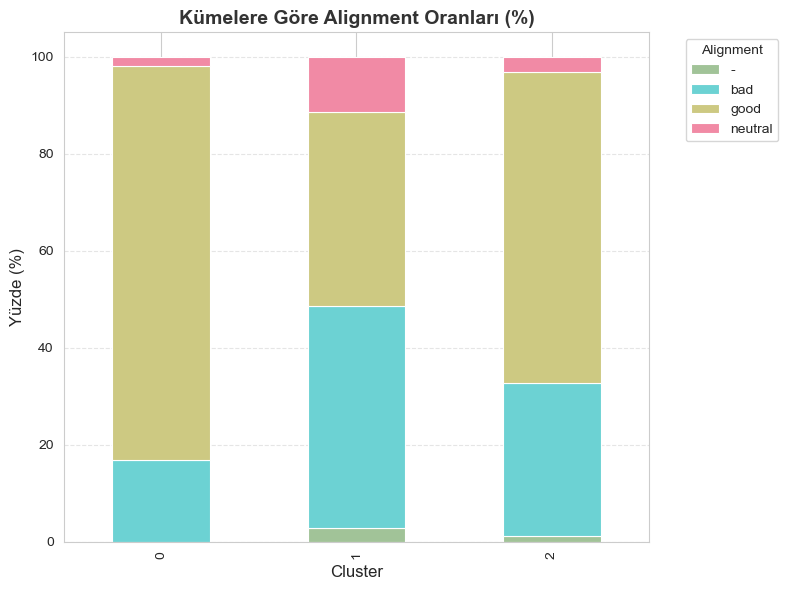

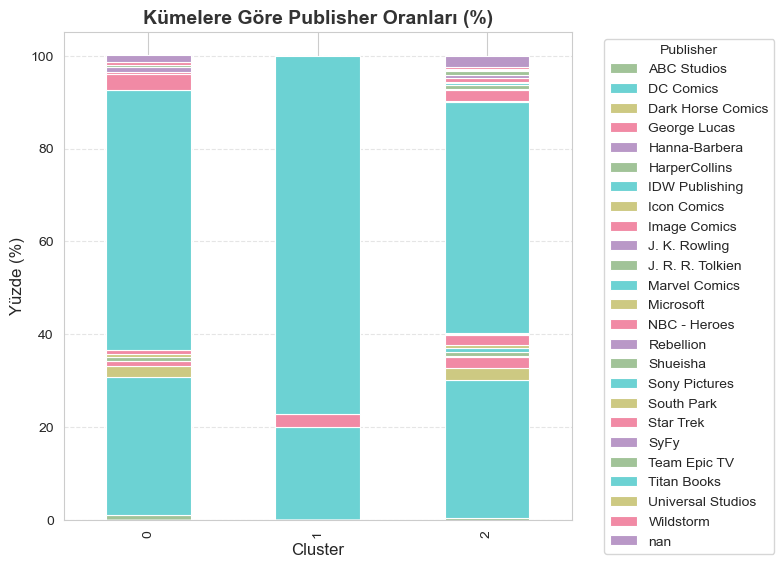

In [336]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def stacked_ratio_plot(df, cat_col, title):
    s = (df[cat_col].astype(str).str.strip())
    ratio = (pd.crosstab(df['Cluster'], s, normalize='index') * 100).round(1)
    soft_colors = ["#A1C398", "#6CD2D3", "#CDC982", "#F18AA5", "#B998C7"]
    sns.set_style("whitegrid")

    ax = ratio.plot(
        kind='bar',
        stacked=True,
        figsize=(8,6),
        color=soft_colors[:len(ratio.columns)],  # sütun sayısına göre renk sayısını ayarla
        edgecolor='white',
        linewidth=0.8
    )
    plt.title(title, fontsize=14, weight='bold', color='#333333')
    plt.xlabel('Cluster', fontsize=12)
    plt.ylabel('Yüzde (%)', fontsize=12)
    plt.legend(title=cat_col, bbox_to_anchor=(1.05,1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

stacked_ratio_plot(shero, 'Alignment', 'Kümelere Göre Alignment Oranları (%)')
stacked_ratio_plot(shero, 'Publisher', 'Kümelere Göre Publisher Oranları (%)')


Cluster 0 : 
İnsansı karakterler (173cm , 67 kg) diğer gruplara göre daha kısa ve hafiftir.  
Baskın cinsiyeti kadın(erkek bulunmamaktadır), baskın yayıncısı marvel olduğunu görmüş olduk.
Yarısından fazlasının 'good' (iyi) alignment kategorisinde yer aldığı gözlenmiştir.

Cluster 1:
Devasa karakterler(282 cm, 400kg) bu kümede yer alır.
Baskın cinsiyeti erkek, baskın yayıncı marvel olduğunu görmüş olduk.
'Kötü' (bad) aligment kategorisinde kahramanlar bu kümede çoğunluktadır.

Cluster 2:
Klasik kahraman tipi(182 cm, 100kg) bu kümede yer alır.
Baskın cinsiyet erkek, baskın yayıncı yine marveldır.
Baskın aligment iyi karakterlerdir.





PCA  ile boyut indirgeme

In [337]:
from sklearn.decomposition import PCA

Xmat = pipe['pre'].transform(Xframe)  
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(Xmat.toarray() if hasattr(Xmat, 'toarray') else Xmat)

shero['PCA1'] = X_pca[:, 0]
shero['PCA2'] = X_pca[:, 1]


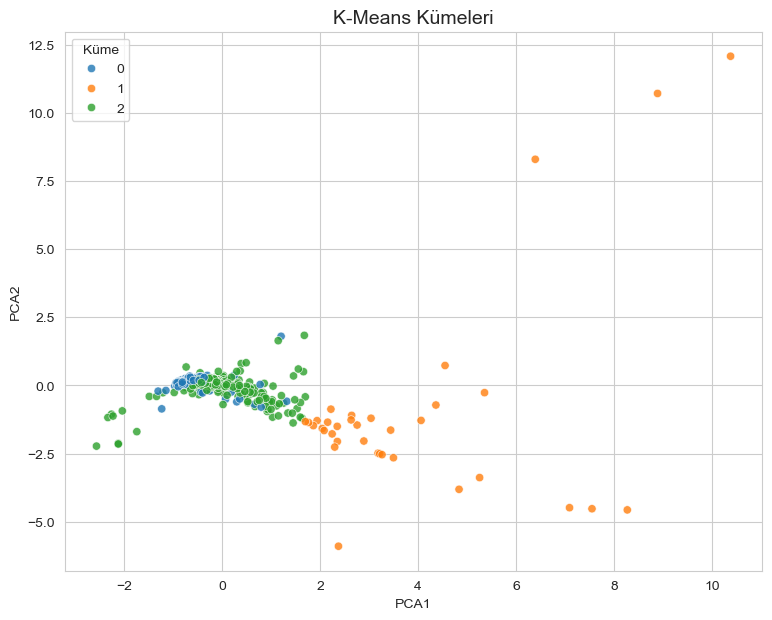

In [338]:
plt.figure(figsize=(9,7))
sns.scatterplot(data=shero, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', alpha=0.8)
plt.title('K-Means Kümeleri', fontsize=14)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Küme')
plt.show()

Kümeler birbirinden görsel olarak belirgin bir şekilde ayrılmıştır.
Cluster 1 (turuncu küme) diğer iki kümeye göre açık bir şekilde farklılaşmakta olup, uç değerleri de kapsadığını göstermektedir.

In [339]:
cluster_summary = shero.groupby('Cluster')[['Height', 'Weight']].mean().round(1)
print(cluster_summary)


         Height  Weight
Cluster                
0         173.2    67.4
1         282.0   400.8
2         182.7   100.6


In [340]:
def safe_mode(s):
    m = s.mode(dropna=True)
    return m.iat[0] if not m.empty else 'Unknown'

summary = pd.DataFrame({
    'Ortalama Boy (cm)': shero.groupby('Cluster')['Height'].mean().round(1),
    'Ortalama Kilo (kg)': shero.groupby('Cluster')['Weight'].mean().round(1),
    'Baskın Irk': shero.groupby('Cluster')['Race'].apply(safe_mode),
    'Baskın Yayıncı': shero.groupby('Cluster')['Publisher'].apply(safe_mode),
    'Baskın Cinsiyet': shero.groupby('Cluster')['Gender'].apply(safe_mode),
    'Toplam Karakter': shero['Cluster'].value_counts().sort_index().values
})

print(summary)


         Ortalama Boy (cm)  Ortalama Kilo (kg) Baskın Irk Baskın Yayıncı  \
Cluster                                                                    
0                    173.2                67.4          -  Marvel Comics   
1                    282.0               400.8          -  Marvel Comics   
2                    182.7               100.6          -  Marvel Comics   

        Baskın Cinsiyet  Toplam Karakter  
Cluster                                   
0                Female              202  
1                  Male               35  
2                  Male              497  


K-Means modeli doğrulama

In [341]:
shero['Alignment'] = (
    shero['Alignment'].astype(str).str.strip().str.lower()
         .replace({'-':'unknown', '': 'unknown', 'nan':'unknown', 'none':'unknown'})
)

tablo_yuzde = (
    pd.crosstab(shero['Cluster'], shero['Alignment'], normalize='index')
      .reindex(columns=['good','bad','neutral','unknown'], fill_value=0)
      .round(2) * 100
)
display(tablo_yuzde)

cluster2label = (
    shero.groupby('Cluster')['Alignment']
         .apply(lambda s: s.value_counts().idxmax())
         .to_dict()
)

Alignment,good,bad,neutral,unknown
Cluster,,,,
0,81.0,17.0,2.0,0.0
1,40.0,46.0,11.0,3.0
2,64.0,32.0,3.0,1.0


In [342]:
shero['Predicted_Alignment'] = shero['Cluster'].map(cluster2label)
acc = (shero['Predicted_Alignment'] == shero['Alignment']).mean() * 100
print(f"K-Means doğruluk: %{acc:.2f}")

labels = ['good','bad','neutral','unknown']
conf = pd.crosstab(shero['Alignment'], shero['Predicted_Alignment']) \
          .reindex(index=labels, columns=labels, fill_value=0)
display(conf)

K-Means doğruluk: %67.85


Predicted_Alignment,good,bad,neutral,unknown
Alignment,,,,
good,482,14,0,0
bad,191,16,0,0
neutral,20,4,0,0
unknown,6,1,0,0


### 6. Sonuçların Yorumlanması

Model iyi karakterleri cluster 0 ve 2 olarak bir araya toplamış.  
Kötü karakter kümesi fiziksel olarak farklı profiller içerdiğinden karışmış durumdadır.  
Neutral ve Unknown karakterler hiçbir kümede baskın çıkmamış bundan dolayı model tahminde bulunamamıştır.


K-Means sonuçları gerçek Alignment etiketleriyle karşılaştırıldığında modelin doğruluk oranı %67.85 olarak hesaplanmıştır.
Model "good" sınıfını yüksek başarıyla yakalamıştır fakat "bad" karakterlerin bir kısmı "good" olarak tahmin edilmiş yani model iyi karaktere fazla eğimlidir.


İyi karakterler dengeli bir profil çizmerken kötü karakterler daha çeşitlilik göstermektedir.

